# Global Terrorism Database

## Loading the Data

In [7]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # maps for plotting

%matplotlib inline

# columns of interest
cols_to_extract = ['eventid','imonth', 'iyear','iday',
 'country_txt','region_txt','provstate','city','latitude','longitude',
 'crit1','crit2','crit3',
 'attacktype1_txt',
 'success','suicide',
 'weaptype1_txt',
 'targtype1_txt',
 'gname',
 'individual','nperps','nperpcap',
 'claimed',
 'nkill','nkillter','nwound','nwoundte',
 'property','propextent_txt',
 'ishostkid','nhostkid','nhours','ndays','kidhijcountry',
 'ransom','ransomamt','ransompaid','hostkidoutcome_txt','nreleased']

# Load data
df = pd.read_excel('GTD_0617dist/globalterrorismdb_0617dist.xlsx',
                   usecols=cols_to_extract,
                   na_values = ['Unknown','-99','-9','Not Applicable'])

# replace some values not correctly dealt with by pandas import
df.replace(-9,np.nan,inplace=True)
df.replace(-99,np.nan,inplace=True)

# entries without month or day - treat as 1st January
df['imonth'].replace(0,1,inplace=True)
df['iday'].replace(0,1,inplace=True)

# create a date column, then get rid of the seaparte year, month and day columns
df['iyear']=pd.to_datetime(dict(year=df.iyear, month=df.imonth, day=df.iday)) 
df.rename(columns={'iyear':'date'}, inplace=True)
df.drop(['imonth','iday'],axis=1,inplace=True)

# set date as the index
df.set_index('date',inplace=True)
print('Done!')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170350 entries, 1970-07-02 to 2016-12-30
Data columns (total 36 columns):
eventid               170350 non-null int64
country_txt           170350 non-null object
region_txt            170350 non-null object
provstate             152649 non-null object
city                  160742 non-null object
latitude              165743 non-null float64
longitude             165744 non-null float64
crit1                 170350 non-null int64
crit2                 170350 non-null int64
crit3                 170350 non-null int64
success               170350 non-null int64
suicide               170350 non-null int64
attacktype1_txt       163925 non-null object
targtype1_txt         165477 non-null object
gname                 92044 non-null object
individual            170350 non-null int64
nperps                26173 non-null float64
nperpcap              99205 non-null float64
claimed               102742 non-null float64
weaptype1_txt         1

## Look at the Structure of the Data

In [71]:
df.info()

# first 5 incidents in 2016
print('==============================')
print('FIRST 5 INCIDENTS IN 2016:')
print('==============================')
display(df['2016'].head(5))

# look at the most common values in each column
print('==============================')
print('TOP 2 VALUES IN EACH COLUMN:')
print('==============================')
top_vals = dict()
for column in df.columns:
    top_vals[column] = df[column].value_counts().index[:2]

top_vals = pd.DataFrame(top_vals).T
top_vals.index.name = 'column'
top_vals.columns = ['1st','2nd']
display(top_vals)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170350 entries, 1970-07-02 to 2016-12-30
Data columns (total 36 columns):
eventid               170350 non-null int64
country_txt           170350 non-null object
region_txt            170350 non-null object
provstate             152649 non-null object
city                  160742 non-null object
latitude              165743 non-null float64
longitude             165744 non-null float64
crit1                 170350 non-null int64
crit2                 170350 non-null int64
crit3                 170350 non-null int64
success               170350 non-null int64
suicide               170350 non-null int64
attacktype1_txt       163925 non-null object
targtype1_txt         165477 non-null object
gname                 92044 non-null object
individual            170350 non-null int64
nperps                26173 non-null float64
nperpcap              99205 non-null float64
claimed               102742 non-null float64
weaptype1_txt         1

,eventid,country_txt,region_txt,provstate,city,latitude,longitude,crit1,crit2,crit3,...,ishostkid,nhostkid,nhours,ndays,kidhijcountry,ransom,ransomamt,ransompaid,hostkidoutcome_txt,nreleased
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,201601010003,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.325091,44.422353,1,1,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,201601010004,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.389934,44.460652,1,1,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,201601010005,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.223512,44.434701,1,1,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01,201601010008,India,South Asia,Punjab,Pathankot,32.268717,75.655513,1,1,1,...,1.0,3.0,NaN,NaN,NaN,0.0,NaN,NaN,Hostage(s) released by perpetrators,3.0
2016-01-01,201601010009,India,South Asia,Punjab,Kathlore,32.244186,75.434659,1,1,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TOP 2 VALUES IN EACH COLUMN:


,1st,2nd
column,,
attacktype1_txt,Bombing/Explosion,Armed Assault
city,Baghdad,Karachi
claimed,0,1
country_txt,Iraq,Pakistan
crit1,1,0
crit2,1,0
crit3,1,0
eventid,200711140022,201508080068
gname,Taliban,Shining Path (SL)


In [10]:
# check for duplicates, ignoring the eventid column
dups = df.drop('eventid',axis=1).duplicated(keep=False)
print('There are',dups.sum(),'rows that have duplicated information in other rows.')

# Some rows are identical to each other.
# E.g. 100 duplicates of GTD ID 201609210029. In this case seems to be
# 100 separte incidents of an explosive being detonated in a civilian
# house. So I will treat the duplicates as genuine.

There are 29616 rows that have duplicated information in other rows.


## No. of Incidents and Casualties per Year

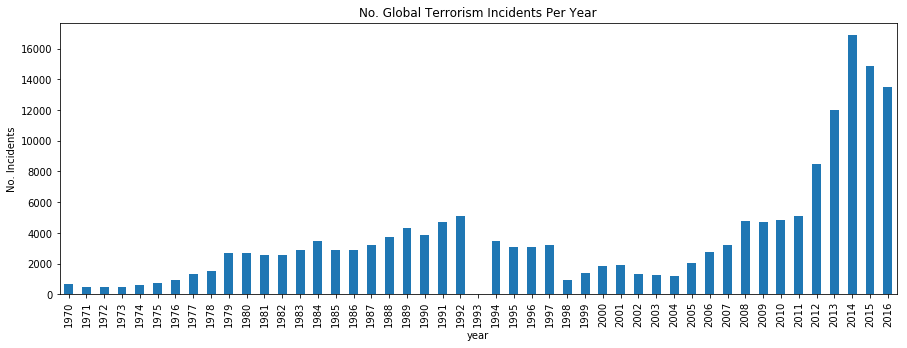

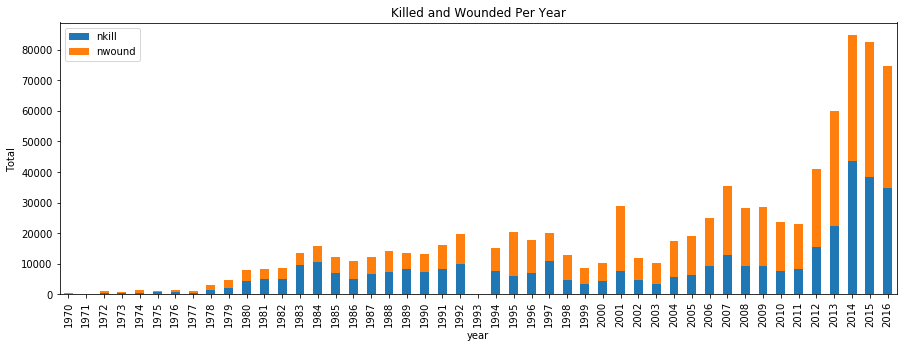

In [11]:
# total incidents per year
tot_inc_yr = df.resample('A')['eventid'].count()
tot_inc_yr.index = tot_inc_yr.index.year
tot_inc_yr.name = 'n_incidents'
tot_inc_yr.index.name = 'year'
plt.figure(figsize=(15,5))
tot_inc_yr.plot.bar(title='No. Global Terrorism Incidents Per Year')
plt.ylabel('No. Incidents');

# total deaths and wounded per year
tot_kill_yr = df.resample('A')[['nkill','nwound']].sum()
tot_kill_yr.name = 'killed_wounded'
tot_kill_yr.index = tot_kill_yr.index.year
tot_kill_yr.index.name = 'year'

ax=plt.figure(figsize=(15,5)).gca()
tot_kill_yr.plot(kind='bar',stacked=True,ax=ax,title='Killed and Wounded Per Year')
plt.legend();
plt.ylabel('Total');

## Countries and Regions with the Most Incidents

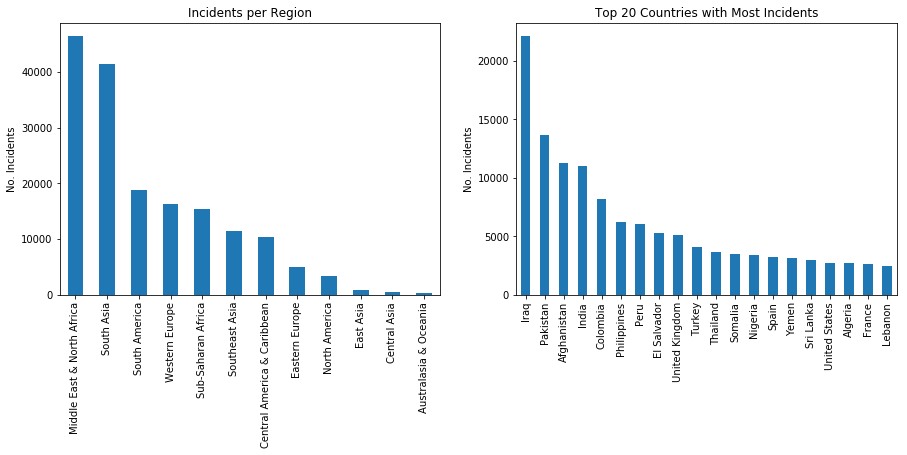

In [73]:
# No. of incidents per region
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['region_txt'].value_counts().plot.bar(title='Incidents per Region')
plt.ylabel('No. Incidents')

plt.subplot(1,2,2)
df['country_txt'].value_counts()[:20].plot.bar(title='Top 20 Countries with Most Incidents')
plt.ylabel('No. Incidents');

## Most Active Groups

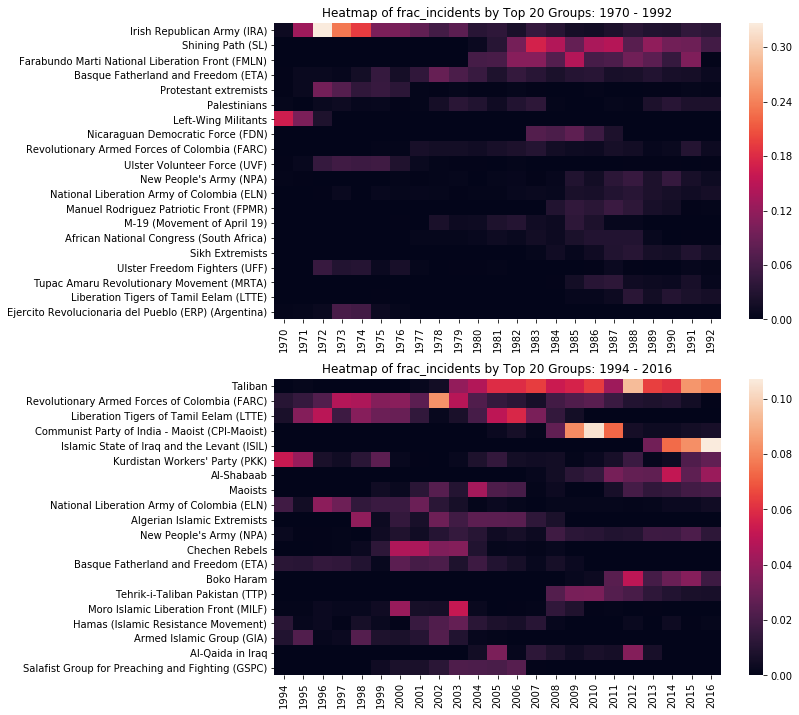

In [154]:
# incidents per year per group
grp_inc_yr = df.groupby([pd.Grouper(freq='A'),'gname'])['country_txt'].count()
grp_inc_yr = grp_inc_yr.unstack('gname',fill_value=0)
grp_inc_yr.name = 'n_incidents'
grp_inc_yr.index = grp_inc_yr.index.year
grp_inc_yr.index.name = 'year'

# fraction incidents per year
grp_frinc_yr = grp_inc_yr.div(tot_inc_yr,axis='rows')
grp_frinc_yr.name = 'frac_incidents'

# heatmap plot function
def plot_heatmap(data,year_range,n_groups=20):
    plot_groups = data.loc[year_range].sum().sort_values(ascending=False)[:n_groups].index
    sns.heatmap(data[plot_groups].loc[year_range].T)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Heatmap of {} by Top {} Groups: {} - {}'.format(data.name,n_groups,min(year_range),max(year_range)))

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plot_heatmap(grp_frinc_yr,list(np.arange(1970,1993)))
plt.subplot(2,1,2)
plot_heatmap(grp_frinc_yr,list(np.arange(1994,2017)))

## Attack Locations for Most Active Groups

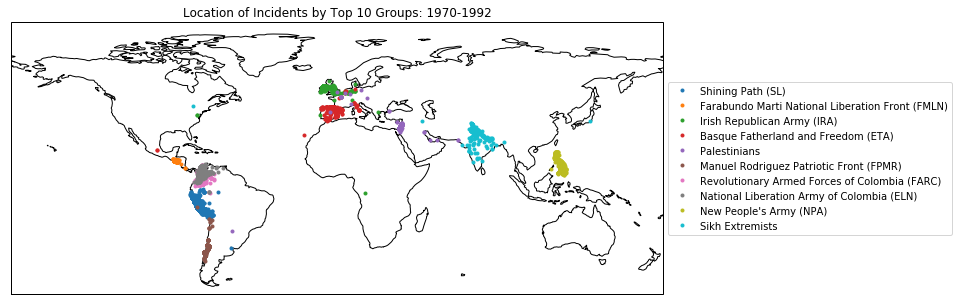

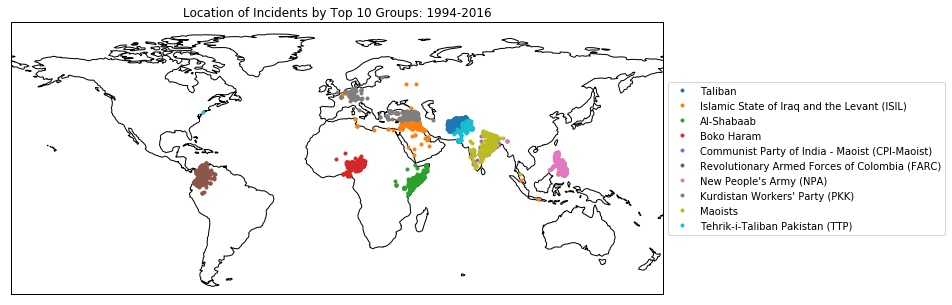

In [123]:
def plot_lonlat(start, stop, ax, n_groups=10):
    '''Plot longitude and latitude for top n_groups
       between the years start and stop'''

    # extract years of interest
    incs = df[start:stop][['gname','longitude','latitude']].dropna()
    
    # find top n_groups for this period
    top_grps = incs['gname'].value_counts().head(n_groups).index
    
    # make figure with map to plot
    fig = plt.figure(figsize=(15,5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    
    for grp in top_grps:
        grp_incs = incs[incs['gname']==grp]
        plt.plot(grp_incs['longitude'],grp_incs['latitude'],label=grp,
                 linestyle='', marker='o', markersize=3)
        
    # Put legend outside plot, from:
    # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
    plt.title('Location of Incidents by Top {} Groups: {}-{}'.format(n_groups,start,stop))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude');
    plt.xlim(-180,180)
    plt.ylim(-60,90)

plot_lonlat('1970','1992',ax)
plot_lonlat('1994','2016',ax)

## Attack Type

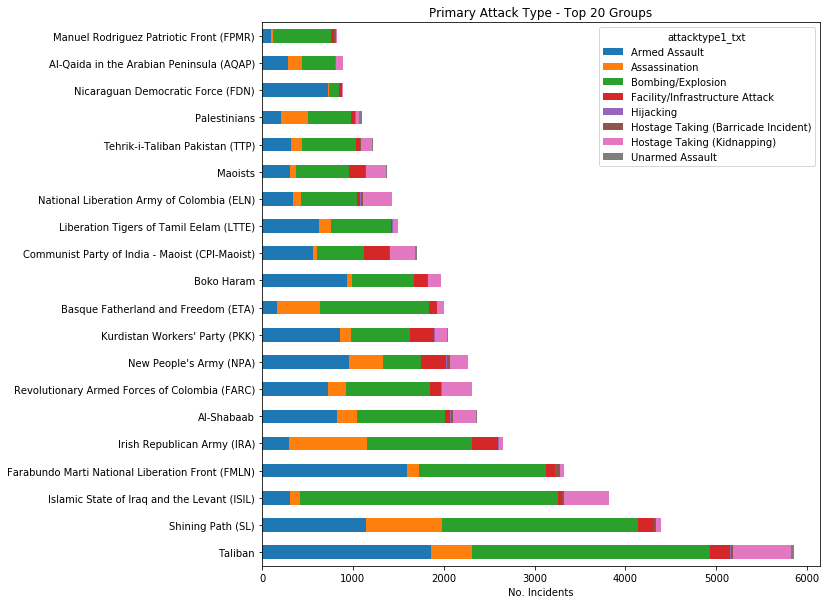

In [16]:
# no. attacks of each type by group
grp_att=df.groupby('gname')['attacktype1_txt'].value_counts().unstack('attacktype1_txt',fill_value=0)
grp_att['tot_inc'] = grp_att.sum(axis=1)
grp_att.sort_values(by='tot_inc',ascending=False,inplace=True)

ax = plt.figure(figsize=(10,10)).gca()
grp_att.drop('tot_inc',axis=1).head(20)\
       .plot(kind='barh',stacked=True,ax=ax)
plt.title('Primary Attack Type - Top 20 Groups')
plt.ylabel('');
plt.xlabel('No. Incidents');

## GTD Inclusion Criteria

Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)

Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) (CRIT2)

Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)

Seems unlikely to be useful since vast majority meet all 3 criteria.

In [173]:
print('crit1:',sum(df['crit1'])/len(df))
print('crit2:',sum(df['crit2'])/len(df))
print('crit3:',sum(df['crit3'])/len(df))

print('all crit:',sum(df['crit1'] & df['crit2'] & df['crit3'])/len(df))

crit1: 0.988441444086
crit2: 0.992985030819
crit3: 0.87981802172
all crit: 0.861244496625


## Deadliest Groups

In [214]:
df['ncasualties'] = df['nkill'].fillna(0) + df['nwound'].fillna(0)

grp_kill = df.groupby('gname')[['nkill','nwound','ncasualties']].sum()
grp_kill.fillna(0,inplace=True)

grp_kill[['maxkill','maxwound','maxcasualties']] = df.groupby('gname')[['nkill','nwound','ncasualties']].max()
grp_kill['ninc'] = df.groupby('gname')['eventid'].count()
grp_kill['casperinc'] = grp_kill['ncasualties']/grp_kill['ninc']

display(grp_kill.sort_values('ncasualties',ascending=False).head(20))

display(grp_kill[grp_kill.ninc>20].sort_values('casperinc',ascending=False).head(20))
display(grp_kill[grp_kill.ninc>20].sort_values('casperinc',ascending=True).head(20))

,nkill,nwound,ncasualties,maxkill,maxwound,maxcasualties,ninc,casperinc
gname,,,,,,,,
Islamic State of Iraq and the Levant (ISIL),30889.0,26477.0,57366.0,1500.0,1500.0,1503.0,4287,13.381386
Taliban,24482.0,23948.0,48430.0,240.0,400.0,536.0,6575,7.365779
Boko Haram,18542.0,8437.0,26979.0,315.0,270.0,392.0,2077,12.989408
Al-Qaida,3610.0,20277.0,23887.0,1383.0,7366.0,8749.0,59,404.864407
Liberation Tigers of Tamil Eelam (LTTE),10988.0,11031.0,22019.0,320.0,1272.0,1362.0,1606,13.710461
Al-Qaida in Iraq,4373.0,10304.0,14677.0,250.0,750.0,1000.0,636,23.077044
Shining Path (SL),11598.0,3028.0,14626.0,100.0,100.0,118.0,4551,3.213799
Tehrik-i-Taliban Pakistan (TTP),5692.0,8886.0,14578.0,158.0,351.0,430.0,1252,11.643770
Al-Shabaab,7348.0,6329.0,13677.0,152.0,201.0,273.0,2683,5.097652


,nkill,nwound,ncasualties,maxkill,maxwound,maxcasualties,ninc,casperinc
gname,,,,,,,,
Al-Qaida,3610.0,20277.0,23887.0,1383.0,7366.0,8749.0,59,404.864407
Tawhid and Jihad,843.0,1738.0,2581.0,110.0,233.0,343.0,50,51.620000
Tutsi,932.0,90.0,1022.0,375.0,42.0,375.0,22,46.454545
Islamic State of Iraq (ISI),1726.0,4489.0,6215.0,102.0,552.0,654.0,145,42.862069
Communist Party of Nepal- Maoist (CPN-M),654.0,319.0,973.0,518.0,216.0,734.0,23,42.304348
Rebels,410.0,1111.0,1521.0,160.0,1001.0,1161.0,37,41.108108
Sanaa Province of the Islamic State,304.0,679.0,983.0,40.0,88.0,128.0,30,32.766667
Abdullah Azzam Brigades,181.0,578.0,759.0,91.0,159.0,201.0,25,30.360000
Hutu extremists,4102.0,872.0,4974.0,1180.0,227.0,1180.0,168,29.607143


,nkill,nwound,ncasualties,maxkill,maxwound,maxcasualties,ninc,casperinc
gname,,,,,,,,
Corsican National Liberation Front- Historic Channel,0.0,0.0,0.0,0.0,0.0,0.0,128,0.000000
Earth Liberation Front (ELF),0.0,1.0,1.0,0.0,1.0,1.0,72,0.013889
Corsican Separatists,1.0,0.0,1.0,1.0,0.0,1.0,63,0.015873
"Weather Underground, Weathermen",1.0,0.0,1.0,1.0,0.0,1.0,45,0.022222
Resistenza,0.0,2.0,2.0,0.0,2.0,2.0,73,0.027397
Meibion Glyndwr,0.0,1.0,1.0,0.0,1.0,1.0,31,0.032258
Animal Liberation Front (ALF),0.0,4.0,4.0,0.0,1.0,1.0,116,0.034483
Chukakuha (Middle Core Faction),2.0,2.0,4.0,2.0,1.0,3.0,61,0.065574
New World Liberation Front (NWLF),1.0,5.0,6.0,1.0,1.0,1.0,86,0.069767


## UK

Northern Ireland    4405
England              652
Wales                 21
Scotland              20
Name: provstate, dtype: int64

Belfast        2139
London          383
Londonderry     349
Armagh          124
Newry           111
Lurgan           71
Crossmaglen      65
Dungannon        61
Strabane         61
Portadown        61
Name: city, dtype: int64

,provstate,city,gname,nkill,nwound,ncasualties,attacktype1_txt
date,,,,,,,
2005-07-07,England,London,Secret Organization of al-Qaida in Europe,27.0,340.0,367.0,Bombing/Explosion
1988-12-21,Scotland,Lockerbie,NaN,270.0,0.0,270.0,Bombing/Explosion
1998-08-15,Northern Ireland,Omagh,Real Irish Republican Army (RIRA),29.0,220.0,249.0,Bombing/Explosion
1973-03-08,England,London,Irish Republican Army (IRA),1.0,238.0,239.0,Bombing/Explosion
1996-06-15,England,Manchester,Irish Republican Army (IRA),0.0,200.0,200.0,Bombing/Explosion
2005-07-07,England,London,Secret Organization of al-Qaida in Europe,8.0,171.0,179.0,Bombing/Explosion
2005-07-07,England,London,Secret Organization of al-Qaida in Europe,7.0,163.0,170.0,Bombing/Explosion
1972-03-04,Northern Ireland,Belfast,Irish Republican Army (IRA),2.0,130.0,132.0,Bombing/Explosion
2005-07-07,England,London,Secret Organization of al-Qaida in Europe,14.0,110.0,124.0,Bombing/Explosion


Bombing/Explosion                      2052
Assassination                          1643
Armed Assault                           634
Facility/Infrastructure Attack          607
Hostage Taking (Kidnapping)              52
Unarmed Assault                          40
Hijacking                                18
Hostage Taking (Barricade Incident)      14
Name: attacktype1_txt, dtype: int64

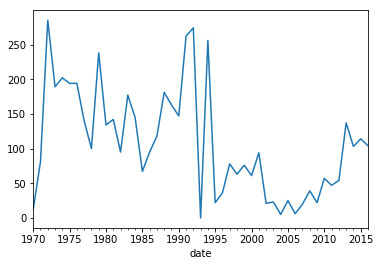

In [247]:
uk=df[df.country_txt == 'United Kingdom']
uk['eventid'].resample('A').count().plot()
display(uk['provstate'].value_counts())
display(uk['city'].value_counts().head(10))
display(uk[['provstate','city','gname','nkill','nwound','ncasualties','attacktype1_txt']].sort_values('ncasualties',ascending=False).head(20))
display(uk['attacktype1_txt'].value_counts())

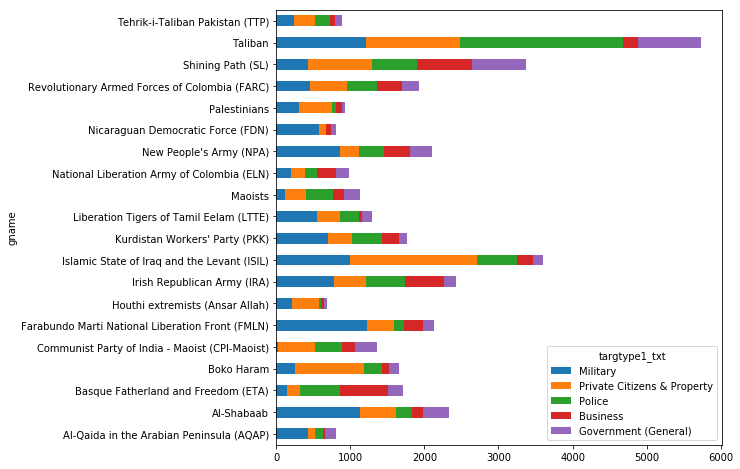

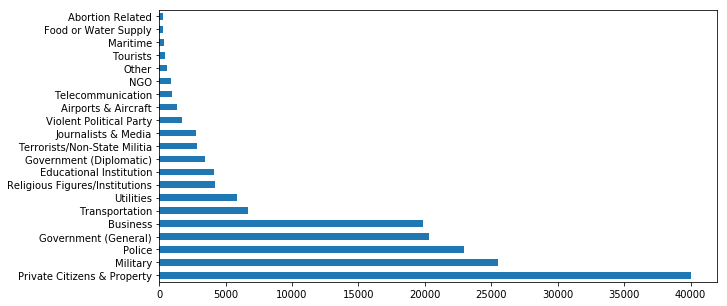

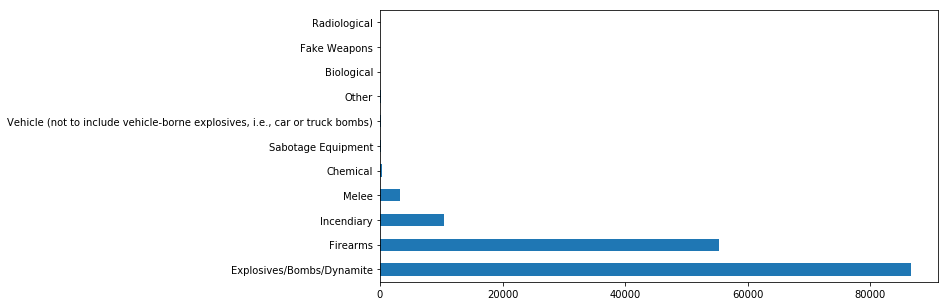

In [333]:
tmp=df.groupby('gname')['targtype1_txt'].value_counts()
toplot=tmp[grp_kill.sort_values('ninc',ascending=False).index[:20].tolist()].unstack(fill_value=0)
ax=plt.figure(figsize=(8,8)).gca()
toplot[['Military','Private Citizens & Property','Police','Business','Government (General)']].plot.barh(ax=ax,stacked=True)

plt.figure(figsize=(10,5))
df['targtype1_txt'].value_counts().plot.barh()

plt.figure(figsize=(10,5))
df['weaptype1_txt'].value_counts().plot.barh()

In [332]:
display(df.groupby('gname')['suicide'].sum().sort_values(ascending=False).head(10))
display(df.groupby('gname')['property'].sum().sort_values(ascending=False).head(10))
display(df.groupby('gname')['ishostkid'].sum().sort_values(ascending=False).head(10))
display(df.groupby('gname')['ransom'].sum().sort_values(ascending=False).head(10))
display(df.groupby('gname')['success'].sum().sort_values(ascending=False).head(10))

gname
Islamic State of Iraq and the Levant (ISIL)    997
Taliban                                        639
Boko Haram                                     300
Tehrik-i-Taliban Pakistan (TTP)                160
Al-Shabaab                                     137
Al-Qaida in Iraq                               128
Al-Qaida in the Arabian Peninsula (AQAP)       124
Liberation Tigers of Tamil Eelam (LTTE)        109
Al-Nusrah Front                                 79
Hamas (Islamic Resistance Movement)             65
Name: suicide, dtype: int64

gname
Shining Path (SL)                                   3532.0
Farabundo Marti National Liberation Front (FMLN)    3190.0
Taliban                                             2461.0
Irish Republican Army (IRA)                         1573.0
Revolutionary Armed Forces of Colombia (FARC)       1520.0
Islamic State of Iraq and the Levant (ISIL)         1364.0
Kurdistan Workers' Party (PKK)                      1335.0
Basque Fatherland and Freedom (ETA)                 1334.0
New People's Army (NPA)                             1163.0
Boko Haram                                          1070.0
Name: property, dtype: float64

gname
Taliban                                             711.0
Islamic State of Iraq and the Levant (ISIL)         529.0
Revolutionary Armed Forces of Colombia (FARC)       393.0
National Liberation Army of Colombia (ELN)          359.0
Communist Party of India - Maoist (CPI-Maoist)      344.0
Al-Shabaab                                          303.0
New People's Army (NPA)                             264.0
Maoists                                             256.0
Abu Sayyaf Group (ASG)                              167.0
Farabundo Marti National Liberation Front (FMLN)    165.0
Name: ishostkid, dtype: float64

gname
Abu Sayyaf Group (ASG)                              71.0
Revolutionary Armed Forces of Colombia (FARC)       53.0
National Liberation Army of Colombia (ELN)          48.0
Basque Fatherland and Freedom (ETA)                 44.0
M-19 (Movement of April 19)                         23.0
Taliban                                             22.0
Salafist Group for Preaching and Fighting (GSPC)    16.0
National Liberation Front of Tripura (NLFT)         13.0
Islamic State of Iraq and the Levant (ISIL)         11.0
Popular Liberation Army (EPL)                       11.0
Name: ransom, dtype: float64

gname
Taliban                                             5952
Shining Path (SL)                                   4335
Islamic State of Iraq and the Levant (ISIL)         3761
Farabundo Marti National Liberation Front (FMLN)    3317
Al-Shabaab                                          2472
Revolutionary Armed Forces of Colombia (FARC)       2296
Irish Republican Army (IRA)                         2280
New People's Army (NPA)                             2177
Kurdistan Workers' Party (PKK)                      2043
Boko Haram                                          1943
Name: success, dtype: int64